In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV (path is from notebooks/ up one level, then into data/clean/)
df = pd.read_csv('../data/clean/flood_cleaned.csv')

# Preview the first 5 rows
df.head()

,uei,start_date,end_date,durationdays,main_cause,location,districts,state,latitude,longitude,...,human_fatality,human_injured,human_displaced,animal_fatality,description_of_casualties/injured,extent_of_damage,event_source,event_souce_id,district_lgd_codes,state_codes
0,UEI-IMD-FL-1967-0001,1967-02-07,1967-08-07,7.0,flood,NaN,NaN,Assam,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,18
1,UEI-IMD-FL-1967-0003,1967-01-08,NaN,30.0,flood,NaN,NaN,Uttar Pradesh,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,NaN,9
2,UEI-IMD-FL-1967-0004,1967-08-09,1967-09-09,2.0,flood,NaN,"Bhadrak, Dhenkanal, Jajapur, Subarnapur, Nuapa...","Odisha, Bihar, Uttar Pradesh, Madhya Pradesh, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Marooning of Barwer Express,IMD,NaN,"348, 352, 356, None, 368, 345, 349, 350, 359, ...","21,10,9,23,8,6"
3,UEI-IMD-FL-1968-0002,1968-08-06,1968-12-06,5.0,"heavy rains, floods",NaN,NaN,West Bengal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Causing floods in West Bengal, Kolkata recieve...",IMD,NaN,NaN,19
4,UEI-IMD-FL-1968-0003,1968-01-07,NaN,30.0,floods,NaN,"Kasaragod, Wayanad, Kozhikode, Malappuram, Pal...","Kerala, Rajasthan, Haryana, Uttar Pradesh, Bihar",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,One passenger train was marooned in flood wate...,IMD,NaN,"558, 567, 561, 562, 563, 566, 556, 555, 554, 5...","32,8,6,9,10"


In [3]:
# See number of rows and columns
print("Dataset shape (rows, columns):", df.shape)

# Get an overview of column data types and non-null counts
df.info()

Dataset shape (rows, columns): (2930, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uei                                2930 non-null   object 
 1   start_date                         2930 non-null   object 
 2   end_date                           2367 non-null   object 
 3   durationdays                       2930 non-null   float64
 4   main_cause                         2919 non-null   object 
 5   location                           0 non-null      float64
 6   districts                          2899 non-null   object 
 7   state                              2930 non-null   object 
 8   latitude                           0 non-null      float64
 9   longitude                          0 non-null      float64
 10  severity                           0 non-null      float64
 11  area_affected 

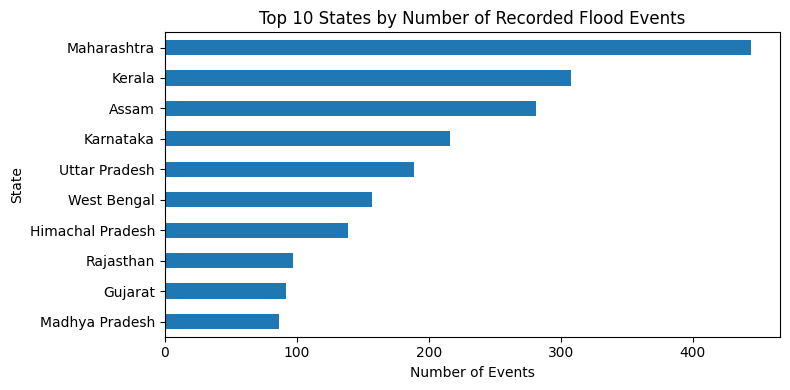

In [6]:
import matplotlib.pyplot as plt

# Count events per state and take the top 10
state_counts = (
    df['state']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)   # sort for a horizontal bar
)

# Plot
state_counts.plot(kind='barh', figsize=(8, 4))
plt.title('Top 10 States by Number of Recorded Flood Events')
plt.xlabel('Number of Events')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [9]:
# Pick out only numeric columns (int or float) first
num_cols = df.select_dtypes(include=['number'])

# Now describe them
summary = num_cols.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
durationdays,2930.0,4.925256,13.346508,1.0,1.0,1.0,5.0,365.0
location,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
severity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_affected,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
human_fatality,1640.0,21.061585,74.214088,1.0,2.0,4.0,14.0,1485.0
human_injured,484.0,13.345041,93.673957,1.0,2.0,3.0,8.0,2000.0
event_souce_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


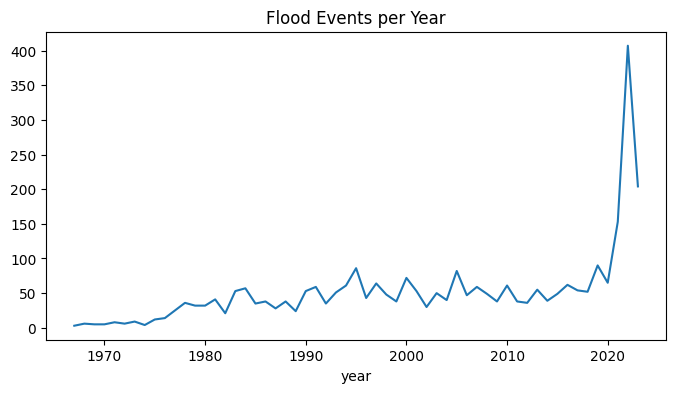

In [10]:
df['year'] = pd.to_datetime(df['start_date']).dt.year
df['year'].value_counts().sort_index().plot(figsize=(8,4))
plt.title('Flood Events per Year')
plt.show()

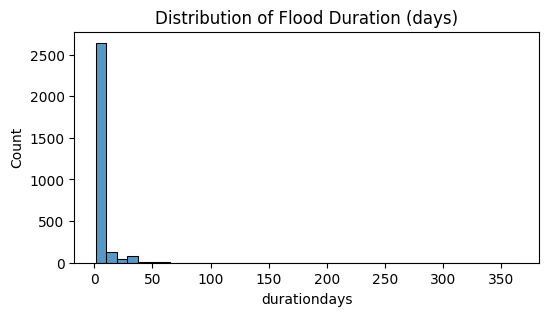

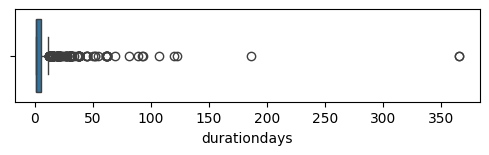

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
fig, ax = plt.subplots(figsize=(6,3))
sns.histplot(df['durationdays'], bins=40, ax=ax)
ax.set_title('Distribution of Flood Duration (days)')
plt.show()

# Box-plot to visualise extreme events
fig, ax = plt.subplots(figsize=(6,1.2))
sns.boxplot(x=df['durationdays'], ax=ax)
ax.set_xlabel('durationdays')
plt.show()

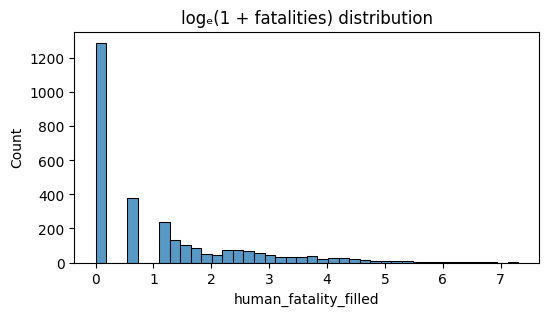

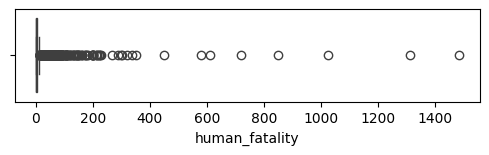

In [14]:
import numpy as np
# Replace NaN with 0 so log1p works safely
df['human_fatality_filled'] = df['human_fatality'].fillna(0)

# Log-histogram
fig, ax = plt.subplots(figsize=(6,3))
sns.histplot(df['human_fatality_filled'].apply(lambda x: np.log1p(x)), bins=40, ax=ax)
ax.set_title('logₑ(1 + fatalities) distribution')
plt.show()

# Box-plot (original scale)
fig, ax = plt.subplots(figsize=(6,1.2))
sns.boxplot(x=df['human_fatality_filled'], ax=ax)
ax.set_xlabel('human_fatality')
plt.show()

In [15]:
# Duration outliers: anything > 60 days
df['duration_outlier'] = df['durationdays'] > 60

# Create a capped version so plots/models aren’t distorted
df['durationdays_capped'] = df['durationdays'].clip(upper=60)

# Fatality outliers: more than 300 deaths
df['fatality_outlier'] = df['human_fatality_filled'] > 300
df['human_fatality_capped'] = df['human_fatality_filled'].clip(upper=300)

print(df['duration_outlier'].sum(), "extremely long-lasting floods")
print(df['fatality_outlier'].sum(),  "extremely deadly floods")

19 extremely long-lasting floods
12 extremely deadly floods


In [16]:
df.to_csv('../data/clean/flood_cleaned_v2.csv', index=False)

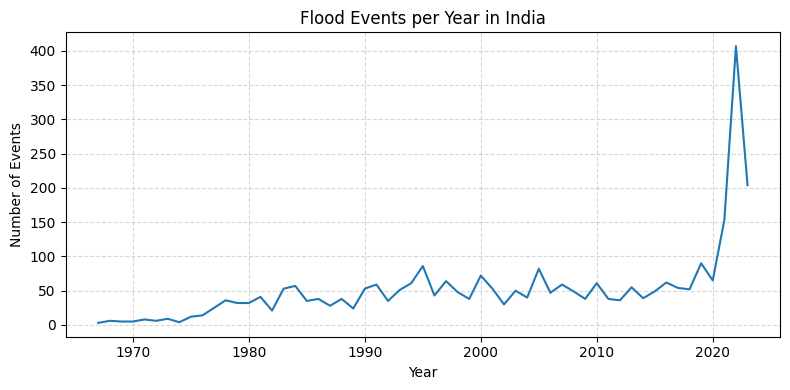

In [17]:
import matplotlib.pyplot as plt

# Extract year from start_date
df['year'] = pd.to_datetime(df['start_date']).dt.year

# Plot number of events per year
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
year_counts.plot()
plt.title('Flood Events per Year in India')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()